# <center>BIẾN LIÊN TỤC</center>

Continuous variable là một dạng biến số phổ biến. Việc mô tả nó là một bước quan trọng trước khi đi vào tìm hiểu các giá trị thực tiễn của tập dữ liệu.  
Một cách biểu diễn đồ thị cho biến số này là dùng whisker boxplot. Trong đó, plot thể hiện được trung vị, quantile, các outliers.

## Khởi tạo 2 dãy số random để mô phỏng, `a` là dãy số random thường, `b` là dãy số random có trọng tâm

In [1]:
import numpy as np
a = np.random.randint(40, 200, size=100)
a

array([149, 147,  52, 184, 123,  52, 193, 162, 157, 144, 185, 116, 168,
       100, 159,  93, 142,  85, 156, 142, 195, 137,  58, 108, 193, 115,
        60, 129, 173, 173, 111, 103, 106, 178, 196,  59, 133, 180,  45,
        89, 112, 195, 126, 148, 117, 168, 105, 141, 107,  98,  64, 179,
       141,  69, 169,  59,  86, 115, 196, 135, 120, 103,  94,  82, 115,
       102,  59,  42, 104, 168,  43, 195, 106,  93,  40,  91, 132, 127,
       113, 112, 175, 143,  44, 170, 141, 131, 125,  65,  49,  62, 165,
       102, 103,  55,  84, 127, 106,  52,  53, 139])

In [48]:
# fake up some data
spread = np.random.rand(50) * 100
center = np.ones(25) * 50
flier_high = np.random.rand(10) * 100 + 100
flier_low = np.random.rand(10) * -100
b = np.concatenate((spread, center, flier_high, flier_low))
b

array([ 78.32075989,  20.1564538 ,   5.46755534,  28.44108511,
        85.06732288,  59.64255678,  57.58411497,  57.35953506,
        15.58395843,   7.64765938,  34.14015598,  33.3386596 ,
        94.23656169,  12.72235499,  12.13953719,  49.54053564,
        80.43266067,   0.56548054,  35.69090753,  63.5545562 ,
        78.75816201,  87.38879262,   9.18500269,  15.78731293,
        18.93448912,  15.59446078,  44.92169615,  29.72363451,
         3.28041133,   1.55492318,  77.99219496,  55.70641573,
        38.72107755,  33.02485076,   0.82127691,  36.55859128,
        66.87961731,  86.64472631,  22.59029985,  44.25347206,
         2.27323173,  41.06738501,  73.43968366,   2.29665938,
        42.02136098,  44.22663982,  46.22470312,  21.87859338,
        85.62691615,   6.58353836,  50.        ,  50.        ,
        50.        ,  50.        ,  50.        ,  50.        ,
        50.        ,  50.        ,  50.        ,  50.        ,
        50.        ,  50.        ,  50.        ,  50.  

## Bước 1: Kiểm tra phân phối của biến bằng Histogram và/hoặc Kernel Density Estimation (KDE).

In [14]:
import seaborn as sns
import matplotlib.pyplot as plt

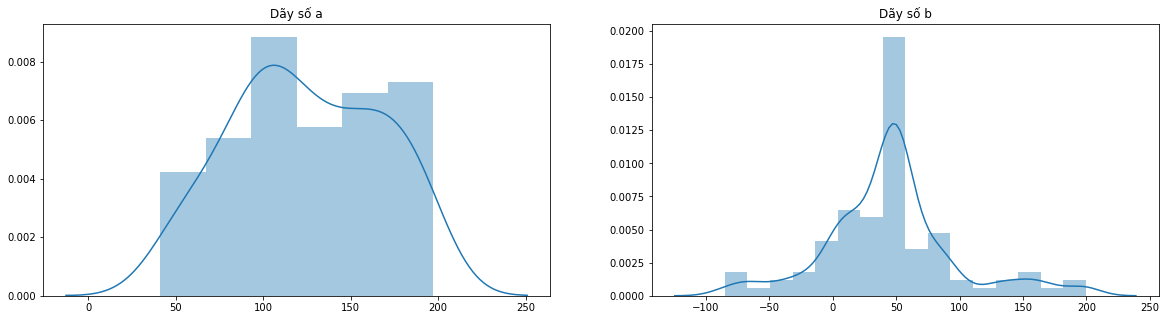

In [50]:
fig, axs = plt.subplots(1,2,figsize=(20,5))

sns.distplot(a, ax=axs[0])
sns.distplot(b, ax=axs[1])

axs[0].set_title("Dãy số a")
axs[1].set_title("Dãy số b");

=> Ta có thể thấy:  
- Dãy số a không tuân theo quy luật phân phối nào cả
- Dãy số b có vẻ giống normal distribution, tuy nhiên 2 cánh 2 bên khá dài

## Bước 2: Đặc tính của biến liên tục: *giá trị trung tâm* và *độ phân bố*

Để mô tả dãy số a, ta dùng:  
- Median: số trung vị
- Quantile: 0.25, 0.5, 0.75 ( Q1, Q2, Q3) hay còn gọi là percentile
- Outliers: những giá trị < Q1-1.5(Q3-Q1) và > Q3+1.5(Q3-Q1)

Để mô tả dãy số b, ta dùng:
- Mean: số trung bình
- Standard deviation: độ lệch chuẩn

#### a. Trung vị và bách phân vị

In [53]:
np.median(a)

122.0

In [21]:
np.quantile(a, [0.25, 0.5, 0.76])

array([ 81., 119., 162.])

#### b. Trung bình và độ lệch chuẩn

In [54]:
np.mean(b)

45.389577453430036

In [55]:
np.std(b)

51.64185499068085

## Bước 3: Whisker boxplot là một biện pháp phát hiện nhanh có outliers

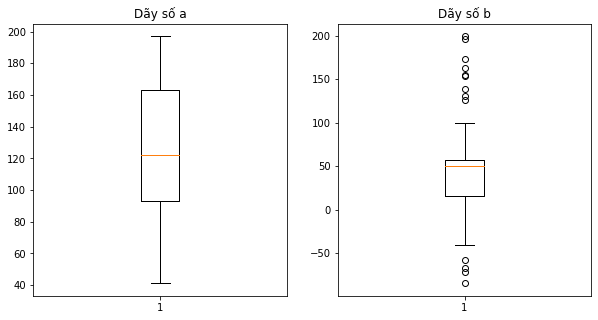

In [52]:
fig, axs = plt.subplots(1,2,figsize=(10,5))

axs[0].boxplot(a)
axs[1].boxplot(b)

axs[0].set_title("Dãy số a")
axs[1].set_title("Dãy số b");

- Dãy số a không có outliers, còn dãy số b có khá nhiều.
- Gạch màu vàng là median ( 0.5 quantile, 50 percentile, Q2)
- Cái hộp là từ Q1 đến Q3
- 2 Cái râu là Q1-1.5(Q3-Q1) và Q3+1.5(Q3-Q1)

## Bước 4: Xử lý Outliers
- Xoá dữ liệu đó
- Chuyển dữ liệu thanh ngưỡng tối đa ( do mình đặt), còn gọi là capping
- Kiểm tra có sai do nhập liệu không
- Biến đổi dữ liệu, ví dụ như scale giá trị từ [0-1]